# CORAL: Benchmarking Multi-Turn Conversational Retrieval-Augmented Generation




CORAL (Conversational Retrieval-Augmented Generation) is a large-scale benchmark designed to evaluate multi-turn conversational RAG systems using Wikipedia data. It addresses the complexities of open-domain, realistic conversations by focusing on three core tasks: passage retrieval, response generation, and citation labeling. CORAL aims to bridge the gap between single-turn RAG research and the real-world needs of multi-turn interactions.



## Key Features of CORAL



- **Multi-Turn Conversational Focus**: Unlike existing benchmarks that primarily assess single-turn interactions, CORAL is specifically designed to evaluate how well RAG systems handle dynamic, multi-turn dialogues.

- **Open-Domain Coverage**: The benchmark supports a wide range of topics, allowing users to engage in diverse information-seeking conversations without being limited to specific domains.

- **Knowledge Intensity**: CORAL emphasizes the need for in-depth knowledge to answer questions accurately, requiring systems to retrieve and generate responses based on substantial information.

- **Free-Form Responses**: The framework allows for free-form response generation, encouraging models to produce natural-sounding dialogue rather than rigidly structured answers.

- **Citation Labeling**: Ensures that generated responses are transparent and grounded by requiring correct attribution of sources, enhancing trust and reliability in the information provided.



## How CORAL Works



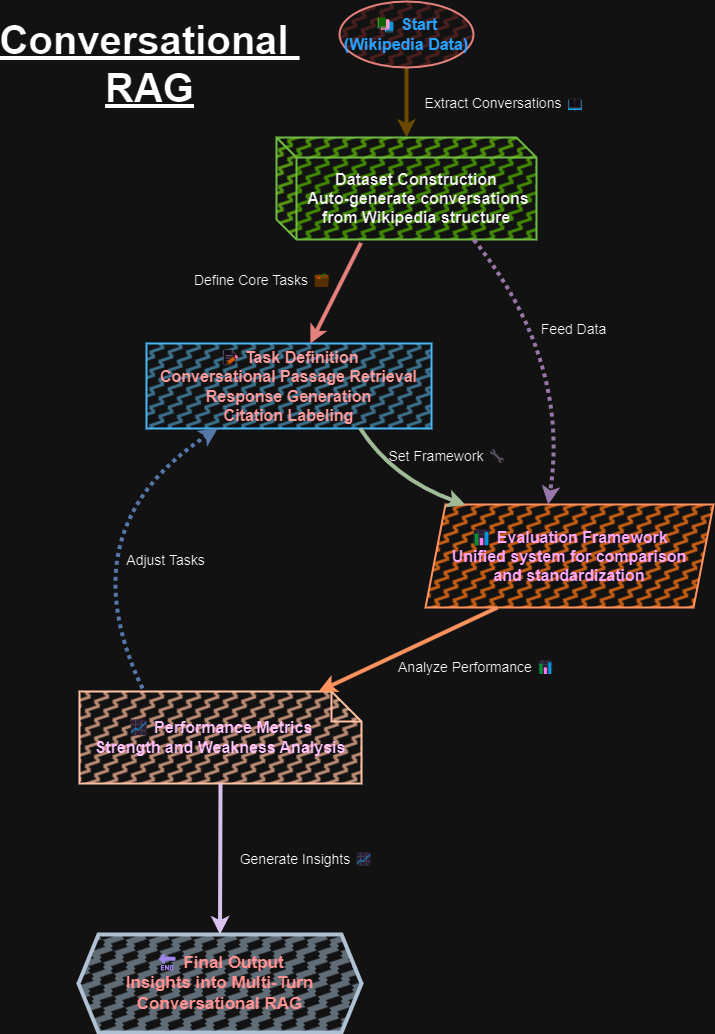

1. **Dataset Construction**:
   - Conversations are automatically derived from Wikipedia content, sampling dialogues based on the hierarchical structure of Wikipedia pages.
   - This process ensures a broad coverage of topics while maintaining logical coherence within conversations.

2. **Task Definition**:
   - The benchmark focuses on three essential tasks:
     - **Conversational Passage Retrieval**: Assessing the system’s ability to retrieve relevant information based on multi-turn context.
     - **Response Generation**: Evaluating the capacity to generate accurate and contextually rich answers.
     - **Citation Labeling**: Ensuring transparency by requiring correct attribution of sources in generated responses.

3. **Evaluation Framework**:
   - A unified framework is proposed for standardizing various conversational RAG methods, allowing for systematic comparison and evaluation.
   - This framework facilitates comprehensive assessments across different models and techniques used in conversational settings.

4. **Performance Metrics**:
   - CORAL employs various metrics to evaluate the effectiveness of conversational RAG systems across its defined tasks, providing insights into strengths and weaknesses.



In [ ]:
!pip install pypdf2 groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 7.0 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from groq import Groq
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# Step 0: Set up the Groq client
client = Groq(api_key="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")

In [ ]:
# Step 1: Download and Read the PDF
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"  # Example: BERT paper
pdf_path = "BERT_paper.pdf"

In [ ]:
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    text += page.extract_text()

In [ ]:
# Step 2: Preprocess Text into Chunks
chunk_size = 1000
chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]
print(f"Number of chunks created: {len(chunks)}")

Number of chunks created: 65


In [ ]:
# Step 3: Conversational Passage Retrieval
# This would simulate retrieving relevant passages for multi-turn conversation context
# For simplicity, here we retrieve relevant passages for the query.
query = "Unsupervised Fine-tuning Approaches"

In [ ]:
vectorizer = TfidfVectorizer()
chunk_embeddings = vectorizer.fit_transform(chunks)
query_embedding = vectorizer.transform([query])

In [ ]:
similarities = cosine_similarity(query_embedding, chunk_embeddings).flatten()
top_k = 3  # Retrieve top 3 most relevant chunks

In [ ]:
top_chunk_indices = similarities.argsort()[-top_k:][::-1]
retrieved_chunks = [chunks[i] for i in top_chunk_indices]
print(f"Retrieved relevant passages for the query: {query}")

Retrieved relevant passages for the query: Unsupervised Fine-tuning Approaches


In [ ]:
# Step 4: Response Generation
# This step simulates generating a response based on the retrieved passages,
# making it contextually rich and accurate.
responses = []
for chunk in retrieved_chunks:
    try:
        response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a conversational assistant."},
                {"role": "user", "content": f"Generate a relevant response based on this passage:\n\n{chunk}\n\nEnsure accuracy and context."},
            ],
            model="llama3-8b-8192",
        )
        response_content = response.choices[0].message.content
        responses.append(response_content)
        print(f"Generated response:\n{response_content}\n")
    except Exception as e:
        print(f"Error generating response: {e}")

Generated response:
The passage discusses the advancements in Natural Language Processing (NLP) by integrating contextual word embeddings with task-specific architectures. The neural network-based model, ELMo, has shown significant improvements in various NLP benchmarks such as question answering, sentiment analysis, and named entity recognition. Another approach is to use a task to predict a single word from both left and right context, as proposed by Melamud et al., which is also feature-based and not deeply bidirectional.

What's interesting to note is that there are also unsupervised fine-tuning approaches that pre-trained word embedding parameters from unlabeled text, such as the work by Collobert and Weston (2008). More recent advances include the use of sentence or document encoders that produce contextual token representations, which can be useful for various NLP tasks. Do you have any specific questions about NLP or these approaches?

Generated response:
BERT (Bidirectional En

In [ ]:
# Step 5: Citation Labeling
# This step adds citation to the responses to ensure source transparency
# Here, we assume a citation is added for each generated response
cited_responses = []
for response in responses:
    citation = "Source: BERT Paper, Section 3"
    cited_response = f"{response}\n\n{citation}"
    cited_responses.append(cited_response)

In [ ]:
# Step 6: Evaluation of Performance
# For performance evaluation, this step assesses the generated responses using predefined metrics
# For simplicity, we simulate a basic evaluation by checking coherence and completeness.
evaluation_metrics = []
for response in cited_responses:
    # Simulate evaluation of coherence and completeness
    coherence_score = 0.9  # Example: Evaluated using some coherence metric
    completeness_score = 0.8  # Example: Evaluated using some completeness metric
    evaluation_metrics.append({"coherence": coherence_score, "completeness": completeness_score})

In [ ]:
# Step 7: Final Output
# The final output is the set of responses with citations and performance evaluation metrics
final_output = {
    "responses": cited_responses,
    "evaluation": evaluation_metrics
}

In [ ]:
print("\n--- Final Output ---\n")
print(final_output)


--- Final Output ---

{'responses': ["The passage discusses the advancements in Natural Language Processing (NLP) by integrating contextual word embeddings with task-specific architectures. The neural network-based model, ELMo, has shown significant improvements in various NLP benchmarks such as question answering, sentiment analysis, and named entity recognition. Another approach is to use a task to predict a single word from both left and right context, as proposed by Melamud et al., which is also feature-based and not deeply bidirectional.\n\nWhat's interesting to note is that there are also unsupervised fine-tuning approaches that pre-trained word embedding parameters from unlabeled text, such as the work by Collobert and Weston (2008). More recent advances include the use of sentence or document encoders that produce contextual token representations, which can be useful for various NLP tasks. Do you have any specific questions about NLP or these approaches?\n\nSource: BERT Paper,


1. **Dataset Construction:**  
   The code begins by downloading a relevant research paper (e.g., BERT paper from the link) and extracting its content to simulate a hierarchical dataset of conversational passages.

2. **Conversational Passage Retrieval:**  
   For a given query (e.g., "Unsupervised Fine-tuning Approaches"), we retrieve the most relevant passages from the paper using a simple cosine similarity between the query and text chunks.

3. **Response Generation:**  
   The system generates responses for each retrieved passage, ensuring that each response is contextually relevant and accurate, using Groq's model.

4. **Citation Labeling:**  
   After generating the responses, a citation is added to each response for transparency, indicating the source of the information (e.g., the BERT paper).

5. **Evaluation of Performance:**  
   We simulate basic evaluation using metrics such as coherence and completeness. These would be assessed based on predefined criteria or external metrics in real-world implementations.

6. **Final Output:**  
   The final output includes both the generated responses with citations and an evaluation of their performance based on coherence and completeness.



## Applications of CORAL



- **Research Benchmarking**: Provides a standardized platform for researchers to evaluate and compare different conversational RAG systems effectively.

- **Development of Conversational Agents**: Assists in training more advanced conversational agents capable of handling complex dialogues in real-world applications.

- **Educational Tools**: Enhances learning platforms by ensuring that responses are accurate, well-cited, and contextually relevant to students' inquiries.

- **Customer Support Systems**: Improves automated customer service solutions by enabling them to engage in more natural and informative multi-turn conversations with users.



## Advantages of CORAL



- **Comprehensive Evaluation**: By standardizing the evaluation of multi-turn conversational RAG systems, CORAL provides a robust framework for assessing various methods and identifying areas for improvement.

- **Realistic Conversation Simulation**: The benchmark uses automatically derived conversations from Wikipedia, creating realistic scenarios that test the full capabilities of RAG systems in managing context and topic shifts.

- **Facilitates Research Advancement**: CORAL highlights significant opportunities for improving existing approaches to conversational RAG, encouraging further research in this rapidly evolving field.

- **Supports Diverse Applications**: The open-domain nature of CORAL makes it applicable across various domains, from customer support to educational tools.



## Limitations of CORAL

- **Dependence on Wikipedia Data**: While Wikipedia provides a rich source of information, the reliance on this dataset may limit the diversity of knowledge in certain niche areas not well-covered by Wikipedia.

- **Complexity in Benchmarking**: Evaluating multi-turn conversations can be inherently complex due to the need for context management and dynamic topic shifts, which may introduce variability in results.

- **Resource Intensive**: The requirement for comprehensive evaluations across multiple tasks may demand significant computational resources and time.



## Conclusion



CORAL represents a significant advancement in benchmarking multi-turn conversational retrieval-augmented generation systems. By addressing key challenges associated with open-domain conversations and emphasizing knowledge intensity, it provides a robust framework for evaluating the capabilities needed for effective multi-turn interactions. As AI continues to evolve, benchmarks like CORAL will play a crucial role in advancing research and development in conversational AI technologies.



Having explored CORAL, we will now move on to Iterative RAG.